Comment out "@ray.remote(num_gpus=1)" in $CODE/scripts/04_extract_frame_features/blip2/blip2_vqa_frame_feature_extractor.py

In [3]:
import os
import cv2
import torch
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

device = "cuda:0"

processor = Blip2Processor.from_pretrained(
    os.path.join(os.environ["SCRATCH"], "mq_libs/blip2")
)
model = Blip2ForConditionalGeneration.from_pretrained(
    os.path.join(os.environ["SCRATCH"], "mq_libs/blip2"),
    torch_dtype=torch.float16,
)
model.to(device)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0): Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
        )
        (1): Blip2EncoderLayer(
          (self_attn): 

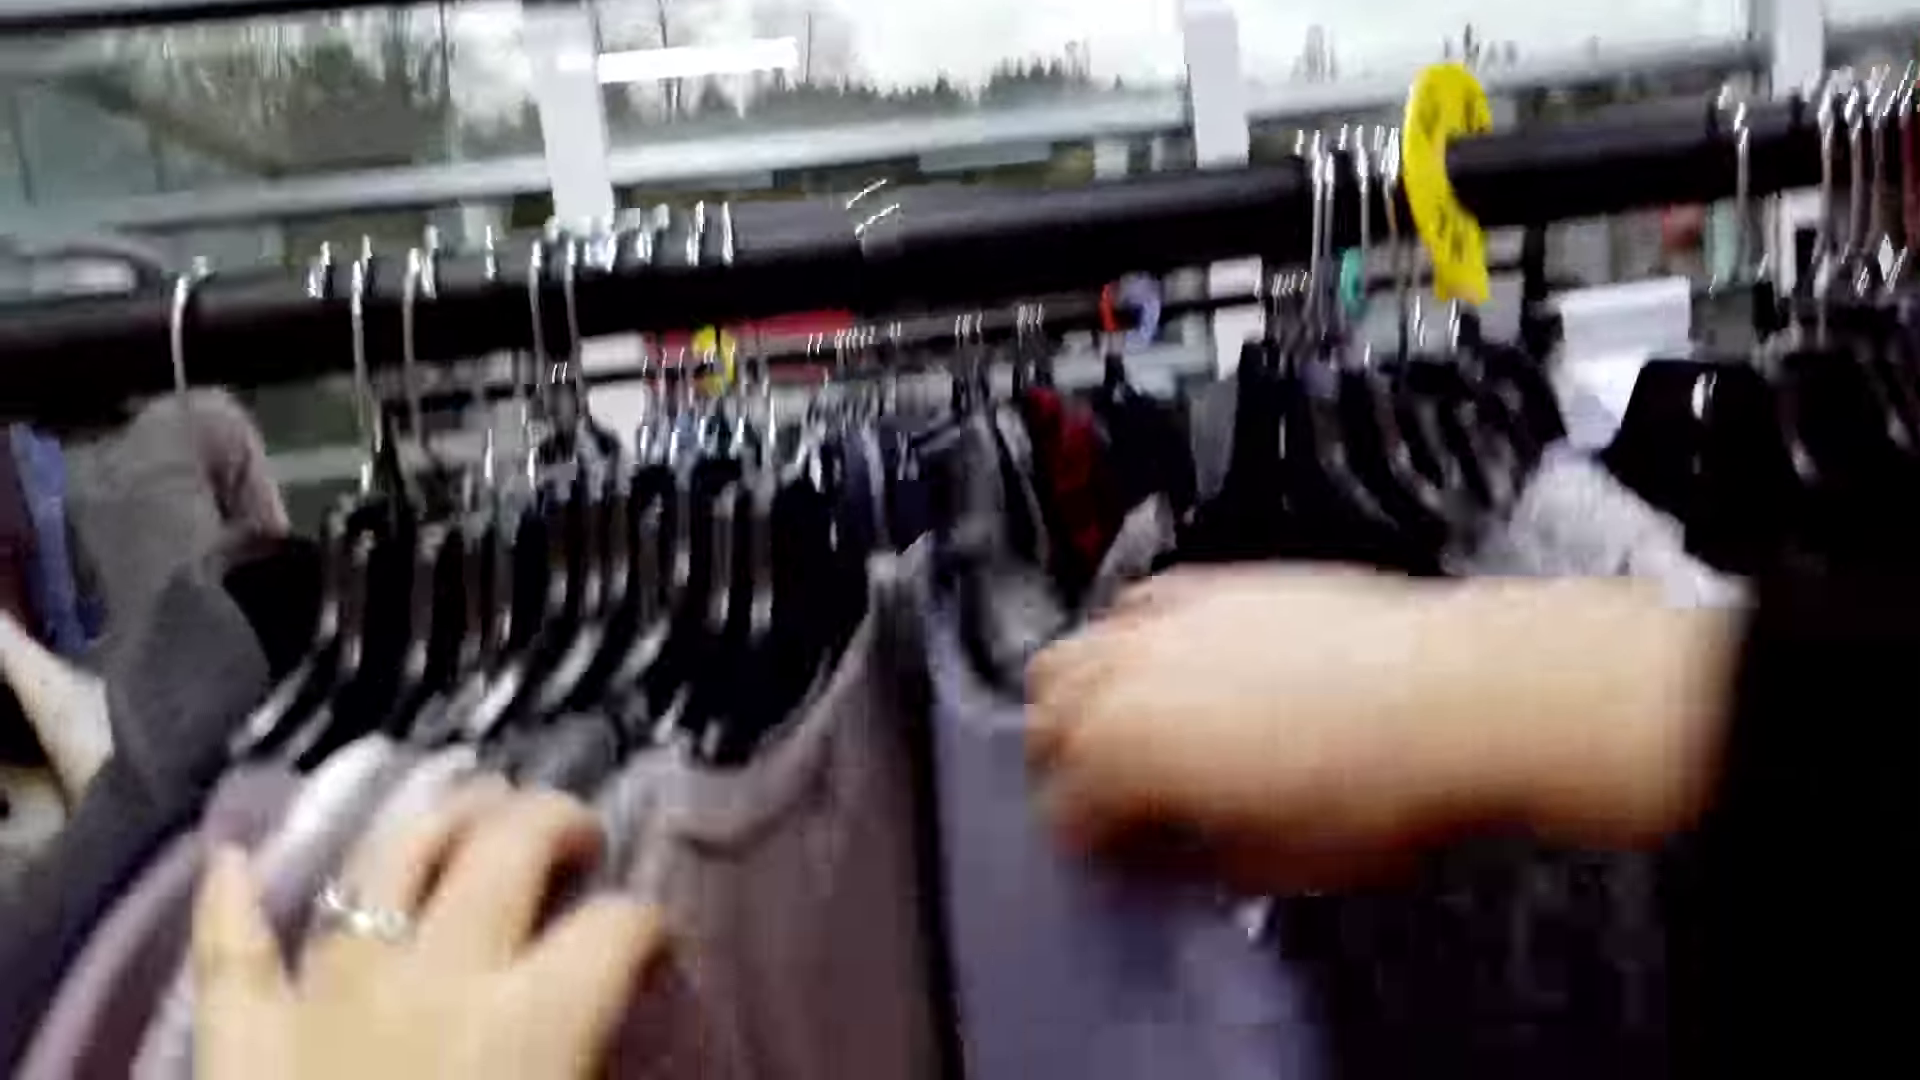

He is looking for clothes


In [7]:
questions = [
    "What does the image describe?",
    "What is the person in this picture doing?",
    "What is happening in this picture?",
    "This picture was with a camera mounted on the head of a person. What is this person doing?"
]
question_id = 3
clip_id = "0076e425-bdb6-48b3-b4d3-695089ac9800"
frame_id = 7000
question = questions[question_id]

cap = cv2.VideoCapture(os.path.join(os.environ["SCRATCH"], "ego4d_data/v2/clips", clip_id + ".mp4"))
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id - 1)
_, frame = cap.read()

frame = Image.fromarray(frame[:, :, ::-1])

with torch.no_grad():
    all_generated_texts = []
    preprocessed_frames_batch_dict = processor(
        images=[
            frame
        ],
        text=["Question: " + question + " Answer:"],
        return_tensors="pt",
    ).to(device, torch.float16)
    generated_ids = model.generate(**preprocessed_frames_batch_dict)
    generated_text = processor.batch_decode(
        generated_ids, skip_special_tokens=True
    )[0].strip()

display(frame)
print(generated_text)


Uncomment out "@ray.remote(num_gpus=1)" in $CODE/scripts/04_extract_frame_features/blip2/blip2_vqa_frame_feature_extractor.py